# Fake News Prediction

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## importing the dataset

In [2]:
df = pd.read_csv('fake_or_real_news.csv')    #importing the Dataset from local Machine
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# Check how the Lables are Distributed

df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [4]:
import string as st    #importing string for the function

In [5]:
#Remove all punctuations

def remove_punctuation(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [6]:
df['New_text']=df['text'].apply(lambda x: remove_punctuation(x))     
df.head()

,Unnamed: 0,title,text,label,New_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...


In [7]:
df = df.drop(['Unnamed: 0'],axis=1)    #Dropping the feature which we don't need
df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...


In [8]:
#Convert text in lower case, Split() applied for white space
import re
def tokenize(text):
    text = re.split('\s+', text)
    return [x.lower() for x in text]

In [9]:
df['New_text'] = df['New_text'].apply(lambda msg:tokenize(msg))
df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[daniel, greenfield, a, shillman, journalism, ..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[us, secretary, of, state, john, f, kerry, sai..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[—, kaydee, king, kaydeeking, november, 9, 201..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[its, primary, day, in, new, york, and, frontr..."


In [10]:
#Removal of tokens less than length 2

def rem_small_words(text):
    return [x for x in text if len(x)>2]

In [11]:
df['New_text'] = df['New_text'].apply(lambda x: rem_small_words(x))
df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[secretary, state, john, kerry, said, monday, ..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[kaydee, king, kaydeeking, november, 2016, the..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[its, primary, day, new, york, and, frontrunne..."


In [12]:
#Remove stopwords
import nltk
from nltk import PorterStemmer, WordNetLemmatizer

def rem_stopword(text):
    return[word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [13]:
df['New_text'] = df['New_text'].apply(lambda x: rem_stopword(x))
df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[secretary, state, john, kerry, said, monday, ..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[kaydee, king, kaydeeking, november, 2016, les..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[primary, day, new, york, frontrunners, hillar..."


In [14]:
#Lemmetization
def lemmatizer(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [15]:
df['New_text'] = df['New_text'].apply(lambda x: lemmatizer(x))
df.head(10)

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[secretary, state, john, kerry, said, monday, ..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[kaydee, king, kaydeeking, november, 2016, les..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[primary, day, new, york, frontrunners, hillar..."
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,"[i’m, immigrant, grandparent, year, ago, arriv..."
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,"[share, baylee, luciani, left, screenshot, bay..."
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,"[czech, stockbroker, saved, 650, jewish, child..."
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,"[hillary, clinton, donald, trump, made, inaccu..."
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,"[iranian, negotiator, reportedly, made, lastdi..."


In [16]:
# Create sentences to get clean text as input for vectors
def return_setances(tokens):
    return " ".join([word for word in tokens])

In [17]:
df['New_text'] = df['New_text'].apply(lambda x: return_setances(x))
df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield shillman journalism fellow f...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,secretary state john kerry said monday stop pa...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king kaydeeking november 2016 lesson to...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,primary day new york frontrunners hillary clin...


In [18]:
df.sample(10)

,title,text,label,New_text
165,Are Tensions With Russia Even Real?,"10-26-16 In September 2015, at the behest of i...",FAKE,102616 september 2015 behest legitimate govern...
4986,Obama again delays Afghanistan troop drawdown,Washington (CNN) President Barack Obama announ...,REAL,washington cnn president barack obama announce...
2902,Presidential Transition of Power Begins amid N...,Trump’s victory has been followed by talk in G...,REAL,trump’s victory followed talk gop circle repea...
4776,"Obama hits the road to push new programs, win ...",President Obama hit the road Wednesday to prom...,REAL,president obama hit road wednesday promote gra...
3687,Why swing voters are vanishing from US politics,People no longer switch allegiances between pa...,REAL,people longer switch allegiance party election...
3302,NYC Democratic Election Commissioner: “They Bu...,"\nIn a video released by Project Veritas, Jame...",FAKE,video released project veritas james oâ€™keefe...
390,Supreme Court Decides to Weigh in On Transgend...,"By Adalia Woodbury on Sun, Oct 30th, 2016 at 1...",FAKE,adalia woodbury sun oct 30th 2016 1131 friday ...
4871,Cruz likely to block Trump on a second ballot ...,Republican presidential candidate Ted Cruz is ...,REAL,republican presidential candidate ted cruz clo...
3771,Rivals pile on Trump in Republican candidates’...,The calamity brought upon the Republican Party...,REAL,calamity brought upon republican party donald ...
2319,Why Obama is changing tune on pulling troops f...,The White House has revised existing plans to ...,REAL,white house revised existing plan withdraw maj...


## Generate Basic WordCloud

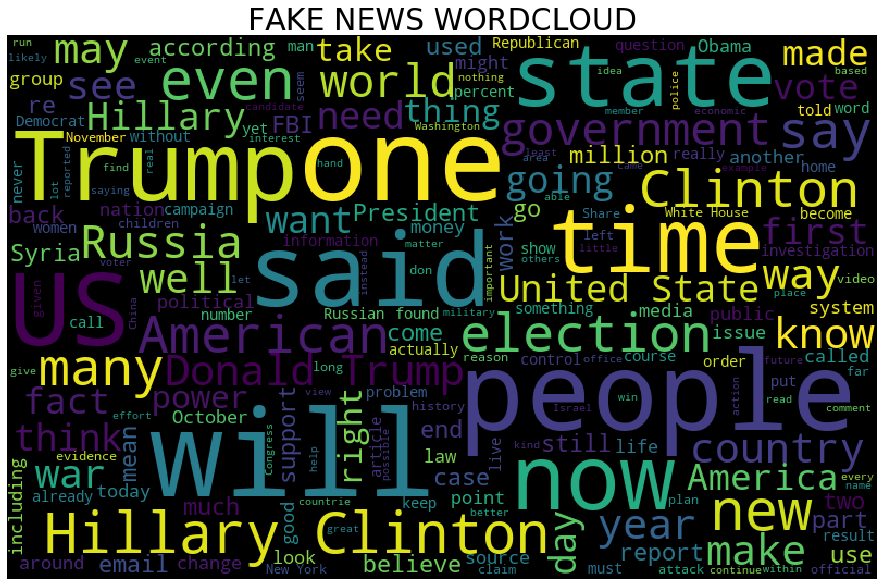

In [19]:
from wordcloud import WordCloud

# Create and generate a word cloud image FAKE_NEWS
fake_data = df[df["label"] == "FAKE"]
fake_text = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(fake_text)
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.title('FAKE NEWS WORDCLOUD',fontsize= 30)
plt.show()




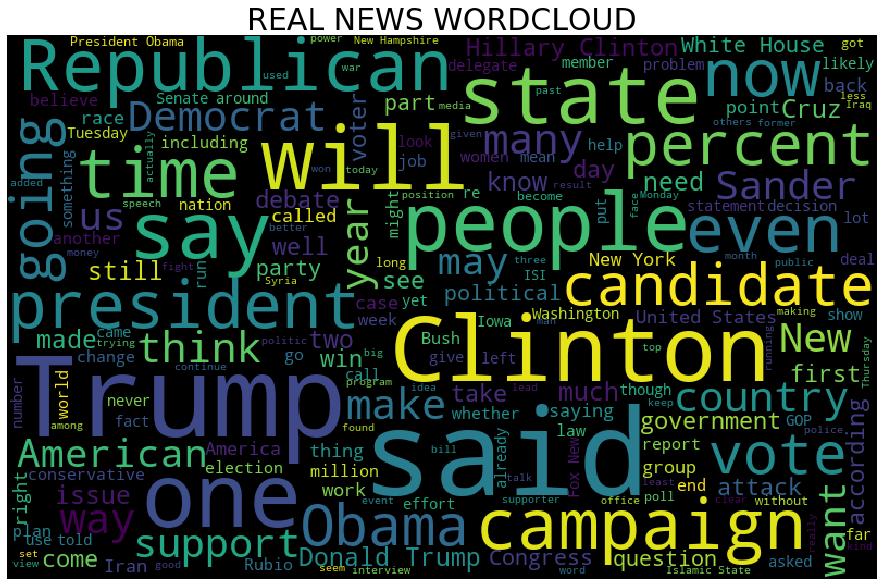

In [20]:
# Create and generate a word cloud image REAL_NEWS
real_data = df[df["label"] == "REAL"]
real_text = ' '.join([text for text in real_data.text])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(real_text)
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.title('REAL NEWS WORDCLOUD',fontsize= 30)
plt.show()

label
FAKE    3164
REAL    3171
Name: text, dtype: int64


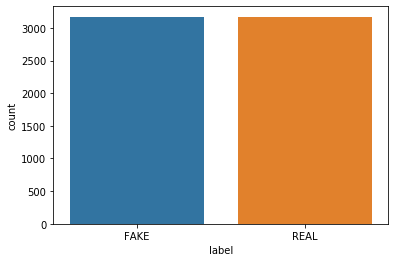

In [21]:
#Comparing the frequency of Fake and Real News
import seaborn as sns          
print(df.groupby(['label'])['text'].count())
sns.countplot(df['label'])

Text(0.5, 1.0, 'Fake news')

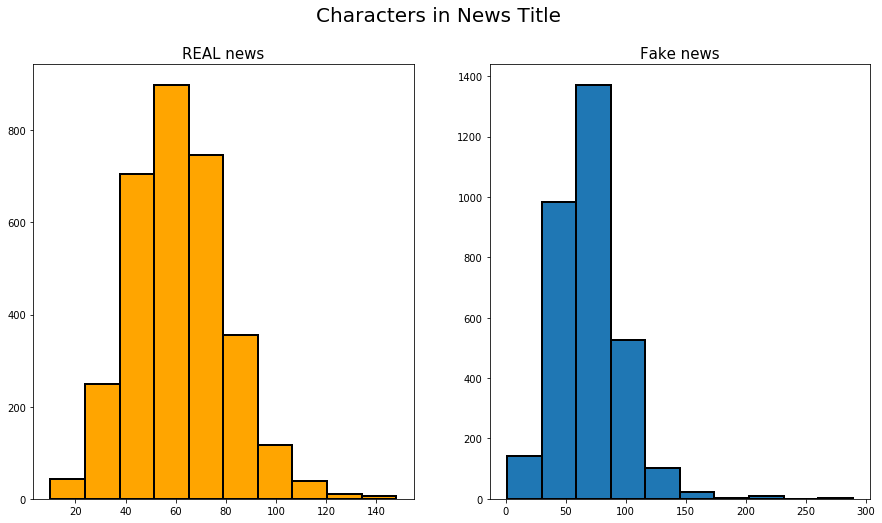

In [22]:
#Comparing the Total numbers of Characters in the Feature Title

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Title',fontsize=20)
news_len=df[df['label']=='REAL']['title'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=df[df['label']=='FAKE']['title'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

Text(0.5, 1.0, 'Fake news')

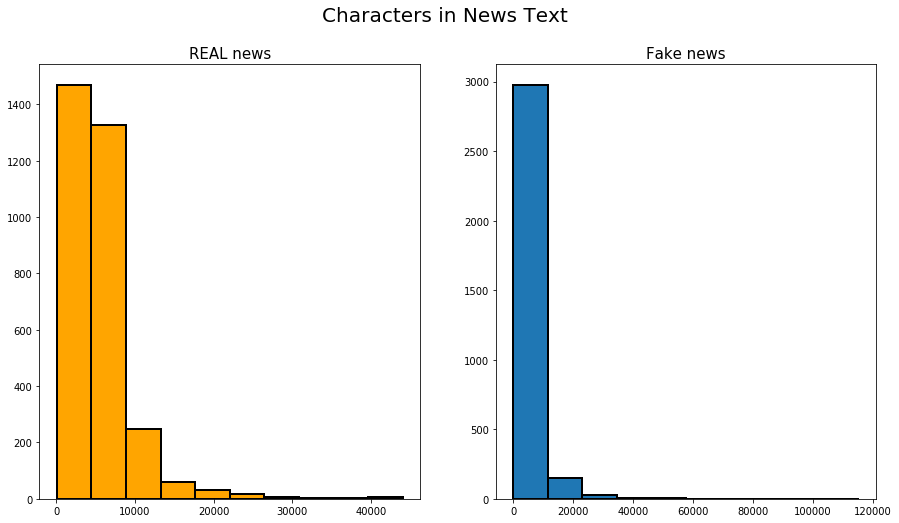

In [23]:
#Comparing the Total numbers of Characters in the Feature Text

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Text',fontsize=20)
news_len=df[df['label']=='REAL']['text'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=df[df['label']=='FAKE']['text'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)


In [24]:
#creating a bag of words with the consecutive frequency for fake text

import nltk
import seaborn as sns
fake_text_vis =' '.join([str(x) for x in df[df['label']=='FAKE']['New_text']])
a = nltk.FreqDist(fake_text_vis.split())
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
d.sample(10)

,Word,Count
44767,239,2
17340,buckaroo,1
71144,phenomenon…,1
39900,okra,1
13388,rutherford,8
70709,injection”,1
10631,“likely”,5
51422,shamefully,1
46229,uppity,2
27443,sexism”,1


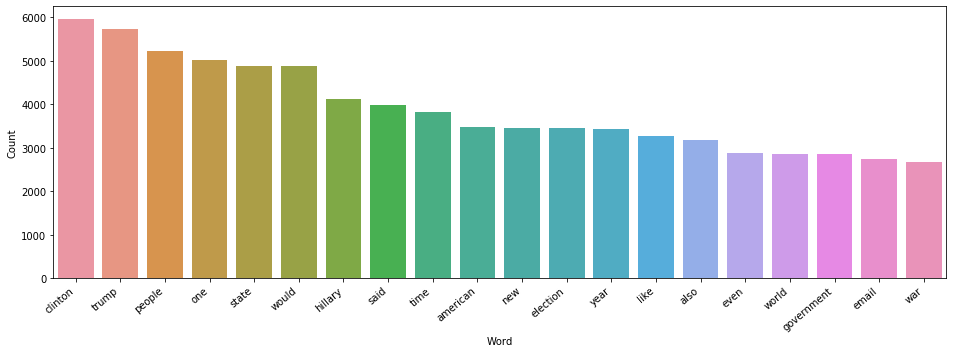

In [25]:
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set_xticklabels(d["Word"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

In [26]:
#creating a bag of words with the consecutive frequency for Real text
import nltk
import seaborn as sns
real_text_vis =' '.join([str(x) for x in df[df['label']=='REAL']['New_text']])
a = nltk.FreqDist(real_text_vis.split())
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
d.sample(10)

,Word,Count
40582,phase—call,1
47810,pugnaciousness,1
45926,deindustrialized,2
54142,endorsed”,1
51734,racketeer,1
5760,protection,267
46471,popularity”,1
16604,rosen,12
6686,outoftheway,1
28522,alaskan,11


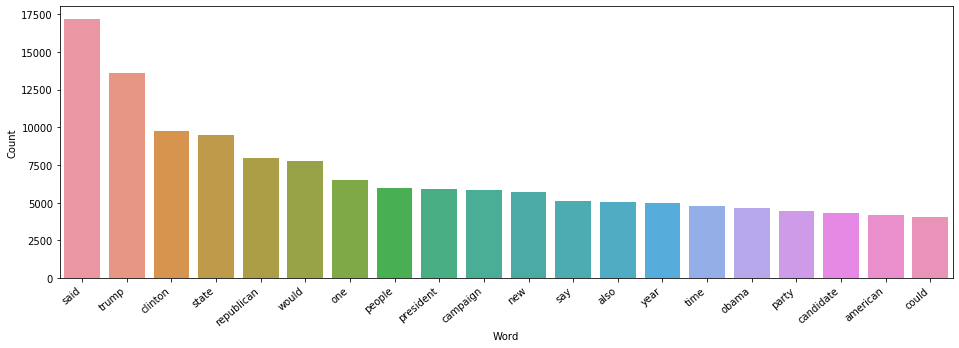

In [27]:
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set_xticklabels(d["Word"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

In [28]:
df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield shillman journalism fellow f...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,secretary state john kerry said monday stop pa...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king kaydeeking november 2016 lesson to...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,primary day new york frontrunners hillary clin...


In [29]:
df["label"]=df["label"].replace(["FAKE","REAL"],value=[1,0]) #Label Encoding

In [30]:
df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,daniel greenfield shillman journalism fellow f...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,google pinterest digg linkedin reddit stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,secretary state john kerry said monday stop pa...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,kaydee king kaydeeking november 2016 lesson to...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,primary day new york frontrunners hillary clin...


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     6335 non-null   object
 1   text      6335 non-null   object
 2   label     6335 non-null   int64 
 3   New_text  6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


## Splitting into training and test set

In [32]:

X_train,X_test,y_train,y_test = train_test_split(df['New_text'],df['label'],test_size=0.2, random_state = 10)

## TF-IDF : Term Frequency - Inverse Document Frequency

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(5068, 70803)
(1267, 70803)


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model1= RandomForestClassifier()
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test,pred1)
cm1 = confusion_matrix(y_test,pred1)
print("Accuracy score : {}".format(accuracy1))
print("Confusion matrix : \n {}".format(cm1))

Accuracy score : 0.9131807419100236
Confusion matrix : 
 [[623  41]
 [ 69 534]]


In [42]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(max_iter = 500)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test,pred2)
cm2 = confusion_matrix(y_test,pred2)
print("Accuracy score : {}".format(accuracy2))
print("Confusion matrix : \n {}".format(cm2))

Accuracy score : 0.9194948697711128
Confusion matrix : 
 [[597  67]
 [ 35 568]]


In [44]:
#Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
model3 = PassiveAggressiveClassifier(max_iter=50)
model3.fit(X_train,y_train)

pred3 = model3.predict(X_test)

accuracy3 = accuracy_score(y_test,pred3)
cm3 = confusion_matrix(y_test,pred3)
print("Accuracy score : {}".format(accuracy3))
print("Confusion matrix : \n {}".format(cm3))

Accuracy score : 0.9431728492501973
Confusion matrix : 
 [[624  40]
 [ 32 571]]


In [45]:
#Support Vector Classification.
from sklearn.svm import SVC
model4=SVC()
model4.fit(X_train,y_train)

pred4 = model4.predict(X_test)

accuracy4 = accuracy_score(y_test,pred4)
cm4 = confusion_matrix(y_test,pred4)
print("Accuracy score : {}".format(accuracy4))
print("Confusion matrix : \n {}".format(cm4))

Accuracy score : 0.9376479873717443
Confusion matrix : 
 [[610  54]
 [ 25 578]]


In [46]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model5=DecisionTreeClassifier()
model5.fit(X_train,y_train)

pred5 = model5.predict(X_test)

accuracy5 = accuracy_score(y_test,pred5)
cm5 = confusion_matrix(y_test,pred5)
print("Accuracy score : {}".format(accuracy5))
print("Confusion matrix : \n {}".format(cm5))

Accuracy score : 0.8011049723756906
Confusion matrix : 
 [[543 121]
 [131 472]]


In [48]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels={'RandomForestClassifier':accuracy1,'LogisticRegression':accuracy2,'PassiveAggressiveClassifier':accuracy3,
        'SVC':accuracy4,'DecisionTreeClassifier':accuracy5}

<BarContainer object of 5 artists>

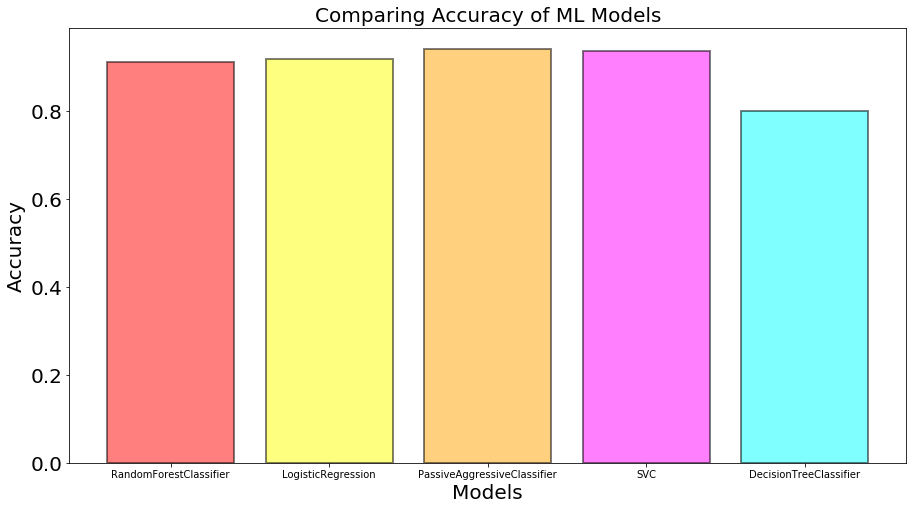

In [89]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','orange','magenta','cyan']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)

Confusion Matrix for RandomForestClassifier
Accuracy score : 0.9131807419100236


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c09999810>)

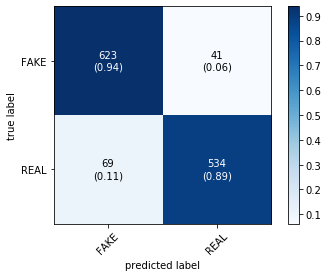

In [83]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for RandomForestClassifier")
print("Accuracy score : {}".format(accuracy1))
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

Confusion Matrix for Logistic Regression
Accuracy score : 0.9194948697711128


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c09a0d450>)

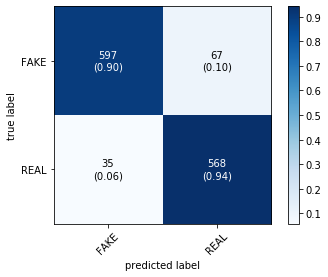

In [84]:
print("Confusion Matrix for Logistic Regression")
print("Accuracy score : {}".format(accuracy2))

plot_confusion_matrix(conf_mat=cm2,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

Confusion Matrix for PassiveAggressiveClassifier
Accuracy score : 0.9431728492501973


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c09bdbf50>)

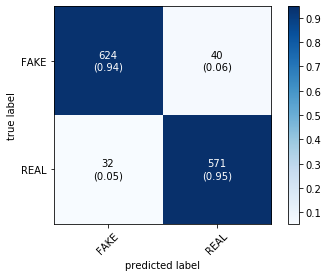

In [85]:
print("Confusion Matrix for PassiveAggressiveClassifier")
print("Accuracy score : {}".format(accuracy3))
plot_confusion_matrix(conf_mat=cm3,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

Confusion Matrix for SVC
Accuracy score : 0.9376479873717443


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c09cbcc50>)

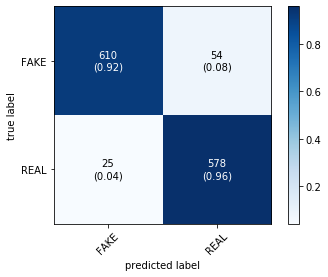

In [86]:
print("Confusion Matrix for SVC")
print("Accuracy score : {}".format(accuracy4))
plot_confusion_matrix(conf_mat=cm4,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

Confusion Matrix for DecisionTreeClassifier
Accuracy score : 0.8011049723756906


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c09dc2d90>)

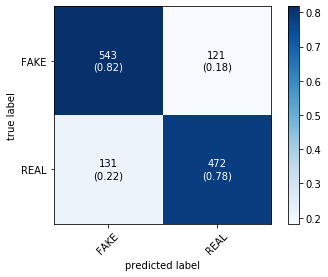

In [87]:
print("Confusion Matrix for DecisionTreeClassifier")
print("Accuracy score : {}".format(accuracy5))
plot_confusion_matrix(conf_mat=cm5,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])